In [112]:
CLEANED_SAVE_PATH = "../cleaned_tweet_data.csv"

In [113]:
import pandas as pd
from wordcloud import STOPWORDS,WordCloud

In [114]:
# taking a csv file path and reading a dataframe

def read_proccessed_data(csv_path):
    try:    
        df = pd.read_csv(csv_path)
        print("file read as csv")
        return df
    
    except FileNotFoundError:
        print("file not found")

In [115]:
df = read_proccessed_data(CLEANED_SAVE_PATH)

file read as csv


In [116]:
# inspecting the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6532 entries, 0 to 6531
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   created_at          6532 non-null   object 
 1   source              6532 non-null   object 
 2   original_text       6532 non-null   object 
 3   polarity            6532 non-null   float64
 4   subjectivity        6532 non-null   float64
 5   lang                6532 non-null   object 
 6   favorite_count      6532 non-null   int64  
 7   retweet_count       4785 non-null   float64
 8   original_author     6532 non-null   object 
 9   followers_count     6532 non-null   int64  
 10  friends_count       6532 non-null   int64  
 11  possibly_sensitive  0 non-null      float64
 12  hashtags            6532 non-null   object 
 13  user_mentions       6532 non-null   object 
 14  place               4088 non-null   object 
 15  friends_count       6532 non-null   float64
 16  clean_

In [117]:
# inspecting the polarity column
df['polarity']
df['polarity'].value_counts()


 0.000000    1829
-0.750000     501
 0.500000     210
 0.133333     201
 0.337500     189
             ... 
-0.190625       1
-0.035714       1
-0.175000       1
 0.186111       1
-0.055556       1
Name: polarity, Length: 401, dtype: int64

In [118]:
# checking if there are null values
text_null_sum = df['clean_text'].isnull().sum()
polarity_null_sum = df['polarity'].isnull().sum()

print(f'sum of null values in clean_text column: {text_null_sum}')
print(f'sum of null values in polarity cloumn: {polarity_null_sum}')

sum of null values in clean_text column: 0
sum of null values in polarity cloumn: 0


In [119]:
# creating cleanedTweet dataframe
cleanedTweet = pd.DataFrame(columns=['clean_text','polarity'])

cleanedTweet['clean_text'] = df['clean_text']
cleanedTweet['polarity'] = df['polarity']
cleanedTweet.dropna(inplace=True)

In [120]:
cleanedTweet

clean_text  polarity
0     🚨africa is "in the midst of a full-blown third...  0.166667
1     dr moeti is head of who in africa and one of t...  0.133333
2     thank you  for creating this amazing campaign ...  0.316667
3     former pfizer vp and virologist dr michael yea...  0.086111
4     i think it’s important that we don’t sell cova...  0.280000
...                                                 ...       ...
6527  rt : zweli please just release the graphic des...  0.000000
6528  former pfizer vp and virologist dr michael yea...  0.086111
6529    respectfully veterinarians have to have a br...  0.281250
6530  "africa needs millions more doses here &amp; n...  0.125000
6531  rt : liars you tried to load off your expired ...  0.000000

[6532 rows x 2 columns]

In [121]:
# takes polarity and returns a string either postive, negative or neutral

def text_category(p: float) -> str:
    if p > 0:
        return "positive"
    elif p == 0:
        return "neutral"
    else:
        return "negative"

In [122]:
# creating score column by applying text_category
cleanedTweet['score'] = cleanedTweet['polarity'].apply(text_category)
cleanedTweet['score'].value_counts()

positive    3426
neutral     1829
negative    1277
Name: score, dtype: int64

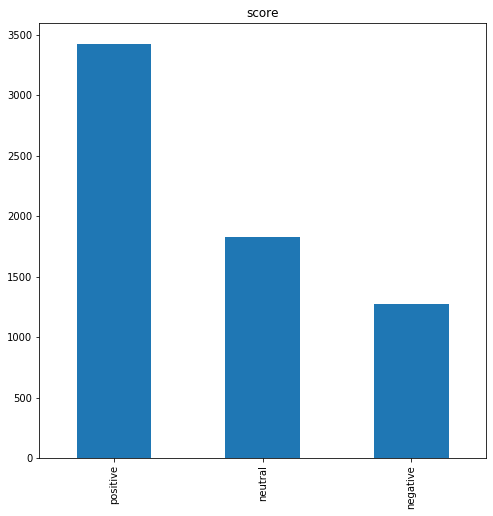

In [123]:
# Grouping the scores and plotting bar graph
score_count =  cleanedTweet['score'].value_counts()
score_count.plot(kind="bar", y="score", title="score", figsize=[8, 8])

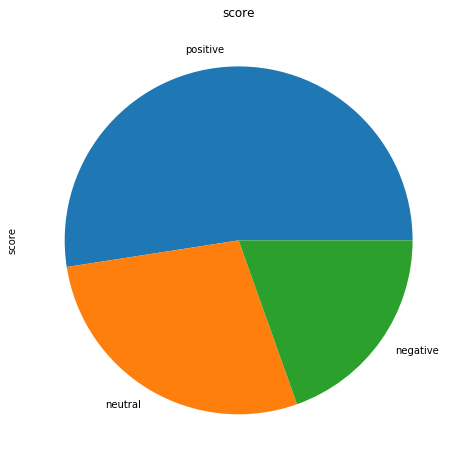

In [124]:
score_count.plot(kind="pie", y="score", title="score", x="", figsize=[8, 8])


In [125]:
# takes a string and returns if a value is "neutral"
def remove_neutral(value):
    return value != "neutral"

In [126]:
# creating score_map column
# we remove all rows that have neutral score
# then create a score_map. if score is "positive" it has value 1 else 0

cleanedTweet = cleanedTweet[cleanedTweet['score'].map(remove_neutral)]
cleanedTweet['score_map'] = cleanedTweet["score"].map( lambda score: 1 if score == "positive" else 0)

/Users/daniel/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [127]:

from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from joblib import dump, load # used for saving and loading sklearn objects
from scipy.sparse import save_npz, load_npz # used for saving and loading sparse matrices
from sklearn.decomposition import NMF, LatentDirichletAllocation
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split

In [128]:
# separating our input and output
(X, y) = cleanedTweet['clean_text'], cleanedTweet['score_map']

In [129]:
# creating CountVectorizer and fitting it
trigram_vectorizer = CountVectorizer(ngram_range=(1, 3))
trigram_vectorizer.fit(X.values)


CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 3), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [130]:
# creating a tri_gram Vector representation for X
X_trigram = trigram_vectorizer.transform(X.values)

In [131]:
# creating a trigram tfidf transformer
trigram_tf_idf_transformer = TfidfTransformer()
trigram_tf_idf_transformer.fit(X_trigram)

TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True)

In [132]:
# creating a tfidf representation of x
X_train_tf_idf = trigram_tf_idf_transformer.transform(X_trigram)

In [133]:
# takes input as X, and ouput as Y, title of model as title
# split the input to train and valid
# use Stochastic Gradient Descent Classifier
# train
# out put the training score and validation score
def train_and_show_scores(X, y, title: str) -> None:
    X_train, X_valid, y_train, y_valid = train_test_split(
        X, y, train_size=0.75, stratify=y
    )

    clf = SGDClassifier()
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    valid_score = clf.score(X_valid, y_valid)
    print(f'{title}\nTrain score: {round(train_score, 2)} ; Validation score: {round(valid_score, 2)}\n')

In [134]:
# train using inputs vectorized as trigram

train_and_show_scores(X_trigram, y, title="trigram")

trigram
Train score: 1.0 ; Validation score: 0.97



In [135]:
# train using inputs vectorized as trigram_tfidf


train_and_show_scores(X_train_tf_idf, y, title="trigram_tf_idf")

trigram_tf_idf
Train score: 1.0 ; Validation score: 0.95



In [136]:
# Topic Modeling

In [137]:
# !pip3 install gensim

In [138]:

import string
import gensim
from gensim.models import CoherenceModel
from gensim import corpora
from pprint import pprint
import pyLDAvis
import pyLDAvis.gensim_models






In [139]:
def remove_stopwords(sent: str) -> str:
    sent_list = sent.split()
    return ' '.join([word for word in sent_list if word not in STOPWORDS])

In [140]:
class TopicModel:
    
    def __init__(self, tweet_df, num_of_topics):
        self.df = tweet_df
        self.num_of_topics = num_of_topics
    
    def extract_text_df(self):
        self.df = pd.DataFrame(self.df['clean_text']) 
        
        return self.df
    
    
    def further_pre_process(self):
        
        self.df['clean_text']= df['clean_text'].apply(lambda x: str(x).translate(str.maketrans(' ', ' ', string.punctuation))) 
        
        self.df['clean_text'] = self.df['clean_text'].apply(remove_stopwords)
        
        return self.df
    
    def prepare_inputs(self):
        
        df = self.extract_text_df()
        df = self.further_pre_process()
        
        sentence_list = [text for text in self.df['clean_text']]
        
        word_list = [sent.split() for sent in sentence_list]
        word_to_int = corpora.Dictionary(word_list)
        
        corpus = [word_to_int.doc2bow(tweet) for tweet in word_list]
        
        return word_list, word_to_int, corpus
    
    def lda_prepared(self, lda_model, corpus,  word_list):
        pyLDAvis.enable_notebook()
        LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model, corpus, word_list)
        return LDAvis_prepared
        
    
            
    def build(self, show_print=False):
        word_list, word_to_int, corpus = self.prepare_inputs()
        
        lda_model = gensim.models.ldamodel.LdaModel(
            corpus, id2word=word_to_int,num_topics=self.num_of_topics, 
            random_state=100, update_every=1, 
            chunksize=100, passes=10, alpha='auto',
            per_word_topics=True
        )
        
        lda_prepared = self.lda_prepared(lda_model, corpus, word_to_int)
        
        
        if show_print:
            pprint(lda_model.print_topics())
        
        return lda_model, lda_prepared
    
        
        

In [141]:
df = read_proccessed_data(CLEANED_SAVE_PATH)
tm = TopicModel(df, 8)
lda_model, lda_prepared =tm.build(show_print=True)

file read as csv
[(0,
  '0.052*"need" + 0.037*"world" + 0.035*"support" + 0.034*"covid19" + '
  '0.033*"countries" + 0.027*"oxygen" + 0.026*"coronavirus" + 0.026*"cases" + '
  '0.024*"rich" + 0.022*"vaccines"'),
 (1,
  '0.041*"covid19" + 0.035*"amp" + 0.035*"vaccines" + 0.023*"australia" + '
  '0.021*"government" + 0.011*"covid" + 0.011*"will" + 0.010*"yet" + '
  '0.010*"graphic" + 0.010*"designers"'),
 (2,
  '0.057*"vaccines" + 0.043*"age" + 0.041*"capacity" + 0.039*"limit" + '
  '0.039*"dose1" + 0.039*"pin" + 0.039*"min" + 0.025*"pmcg" + 0.023*"hospital" '
  '+ 0.019*"1845"'),
 (3,
  '0.054*"covid19" + 0.039*"vaccines" + 0.024*"vaccination" + 0.018*"people" + '
  '0.017*"vaccine" + 0.015*"doses" + 0.014*"will" + 0.014*"risk" + 0.013*"go" '
  '+ 0.012*"administered"'),
 (4,
  '0.098*"africa" + 0.069*"one" + 0.036*"dr" + 0.027*"vaccines" + '
  '0.026*"urgently" + 0.026*"public" + 0.023*"know" + 0.022*"uk" + '
  '0.022*"health" + 0.020*"technology"'),
 (5,
  '0.043*"covaxin" + 0.038*"co

In [142]:
lda_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3     -0.050226  0.196331       1        1  20.835076
7      0.237506  0.109832       2        1  13.886245
2      0.285365 -0.113674       3        1  13.265830
1     -0.018802  0.175884       4        1  12.761029
6     -0.185535 -0.072350       5        1  11.167640
5     -0.114452  0.060483       6        1  10.583496
0     -0.140704 -0.065311       7        1  10.095634
4     -0.013153 -0.291194       8        1   7.405050, topic_info=         Term         Freq        Total Category  logprob  loglift
224     india  1333.000000  1333.000000  Default  30.0000  30.0000
19     africa  1535.000000  1535.000000  Default  29.0000  29.0000
210        rt  1206.000000  1206.000000  Default  28.0000  28.0000
472    israel  1023.000000  1023.000000  Default  27.0000  27.0000
471   expired   850.000000   850.000000  Default  26.0000  26.0000
..        ...          ...          ...      ...      ...      ...
22         dr   310.929414   411.149302   Topic8  -3.3221   2.3236
19     africa   847.772818  1535.875431   Topic8  -2.3190   2.0088
8        head   160.563179   257.269158   Topic8  -3.9830   2.1316
26     health   187.061042   576.780400   Topic8  -3.8302   1.4770
42   vaccines   231.356363  4418.790066   Topic8  -3.6177  -0.3467

[342 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
688       6  0.996622        0
285       1  0.584952        1
285       6  0.413425        1
1048      6  0.995392      118
681       6  0.994068       18
...     ...       ...      ...
2953      4  0.991860    zweli
510       6  0.996034        …
6664      2  0.981719  ❤️india
6440      2  0.995938        🔰
18        7  0.981876        🧵

[353 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 8, 3, 2, 7, 6, 1, 5])